In [54]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
#read
imdb = pd.read_csv('imdbmovies.csv')
imdb.head(2)

/Users/brandon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [4]:

#list(imdb.columns)

In [5]:
#cleaning NA from imdb df based on budget,wwgross and production_company columns, to display only studios with budget and gross
budget_na = imdb[imdb['budget'].str.len() > 0]
wwgross_na  = budget_na[budget_na['worlwide_gross_income'].str.len() > 0]
usa_gross_na= wwgross_na[wwgross_na['usa_gross_income'].str.len() > 0]
studio_df=pd.DataFrame(usa_gross_na)
studio_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.1,55601,$ 18000,$ 8811,$ 8811,NaN,237.0,160.0
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",An extended family split up in France and Germ...,7.2,3058,$ 800000,$ 9183673,$ 9183673,NaN,45.0,16.0
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,162668,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0


In [6]:
#currency converter

currency_converter = {
  "ATS": 0.79,
  "THB": 0.033,
  "PLN": 0.27,
  'NOK':  0.12,
 'NGN': 0.0026,
 'BEF':  0.030,
 'IEP':  1.54,
 'NOK':  0.12,
 'NGN': 0.0026,
 'BEF':  0.030,
 'IEP':  1.54,
 'CZK': 0.047,
 'CAD': 0.79,
 'HUF':  0.0034,
 'FRF': 0.185, 
 'CLP': 0.0014,
 'CNY':  0.15,
 'JPY':0.0095,
 'AUD':0.79,
 'GBP' : 1.41, 
'BRL': 0.18,
 'ZAR': 0.069,

 'ARS': 0.011,
 'RUR': 0.013,
 'SGD': 0.76,
 'ESP': 1.22,
 'DOP': 0.017,
 'KRW': 0.00090, 
'DEM': 0.621,
 'FIM': 0.2041,
 'CHF': 1.10,
 'SEK': 0.12,
'INR':0.014,
 'ILS': 0.31,
 'ITL': 0.000627,
 'MXN': 0.049,
 'ISK': 0.0078,
 'VEB': 0.100125,
 'HKD': 0.13,
 'DKK': 0.16,
 'EUR': 1.22,
 'NZD': 0.73,
   '$':1 
}

currency_converter

{'ATS': 0.79,
 'THB': 0.033,
 'PLN': 0.27,
 'NOK': 0.12,
 'NGN': 0.0026,
 'BEF': 0.03,
 'IEP': 1.54,
 'CZK': 0.047,
 'CAD': 0.79,
 'HUF': 0.0034,
 'FRF': 0.185,
 'CLP': 0.0014,
 'CNY': 0.15,
 'JPY': 0.0095,
 'AUD': 0.79,
 'GBP': 1.41,
 'BRL': 0.18,
 'ZAR': 0.069,
 'ARS': 0.011,
 'RUR': 0.013,
 'SGD': 0.76,
 'ESP': 1.22,
 'DOP': 0.017,
 'KRW': 0.0009,
 'DEM': 0.621,
 'FIM': 0.2041,
 'CHF': 1.1,
 'SEK': 0.12,
 'INR': 0.014,
 'ILS': 0.31,
 'ITL': 0.000627,
 'MXN': 0.049,
 'ISK': 0.0078,
 'VEB': 0.100125,
 'HKD': 0.13,
 'DKK': 0.16,
 'EUR': 1.22,
 'NZD': 0.73,
 '$': 1}

In [7]:
#retrieving all currencies

#converting dollar and non dollar currencies into dollar value


def currency_converter_func(currency_conv_list, currency_converter):
    
    """This function takes a a dictionary of currencies and their dollar conversion rate (currency_conv_list)
       and certain amounts of money with their respective currency attached and converts to its  dollar value
    """
    converted_usd_rate = []
    for i in currency_conv_list:
        for j, y in currency_converter.items():
            init = i.split()
            curr_key = init[0]
            curr_value = init[1]
            if curr_key == j:
                convert_rate = int(init[1]) * y
                converted_usd_rate.append(convert_rate)
            
    return converted_usd_rate


#converted_usd_rate   
    
#len(converted_usd_rate)

In [8]:
#converting dollar and non dollar currencies into dollar value

currency_conv_list = studio_df["budget"].tolist()

converted_currencies = currency_converter_func(currency_conv_list, currency_converter)
converted_currencies



[18000,
 800000,
 3726000.0,
 1500000,
 1500000,
 60000,
 1499000,
 3977000,
 1900000,
 1017592.5,
 2777000,
 2280000,
 2600000,
 839727,
 1400000,
 950000,
 48000000,
 2100000,
 1700000,
 30000,
 8000000,
 2000000,
 133000,
 3000000,
 1400000,
 2900000,
 250000,
 1752000,
 2723903,
 1500000,
 4000000,
 2540800,
 720000,
 1650000,
 20000,
 1000000,
 30000,
 4000000,
 5000000,
 2000000,
 1400000,
 175000,
 1000000,
 438899.99999999994,
 1187500.0,
 5019770,
 3237500.0,
 4000000,
 120250000.0,
 1500000,
 6000000,
 5400000,
 13282712,
 3000000,
 83250000.0,
 6000000,
 2484000.0,
 829000,
 2479000,
 15000000,
 12420000.0,
 6000000,
 74000.0,
 180000,
 806947,
 12000000,
 5000000,
 539,
 4000000,
 55000,
 160000,
 6000000,
 1100000,
 15000000,
 15000000,
 2200000,
 2000000,
 64000,
 44000000,
 1800000,
 2000000,
 9400000,
 900000,
 3000000,
 120000,
 3000000,
 3000000,
 560000,
 6000000,
 17000000,
 160000,
 200000,
 220000,
 800000,
 800000,
 11000000,
 3800000,
 600000,
 300000,
 8200000,

In [9]:
#retrieving their ids

#ids = studio_df["imdb_title_id"]
#new_ids = ids.tolist()
#new_ids

In [10]:
#converting the currencies into dollars and adding to dataframe

converted_usd_rate_df = pd.DataFrame(converted_currencies)
converted_usd_rate_df.rename(columns={0:"Budget_Dollar_Equiv"}, inplace=True)
converted_usd_rate_df



,Budget_Dollar_Equiv
0,18000.0
1,800000.0
2,3726000.0
3,1500000.0
4,1500000.0
...,...
8121,10000000.0
8122,5000000.0
8123,11100000.0
8124,12000000.0


In [11]:
#merged_studio_dollar_df["Budget_Dollar_Equiv"] = converted_usd_rate_df
#merged_studio_dollar_df.head()

#merged_studio_dollar_df = pd.merge(studio_df, converted_usd_rate_df, how="left", on="imdb_title_id")
#merged_studio_dollar_df.rename(columns={0 :"Dollar_Equiv"}, inplace=True)


In [12]:
#creating a copy of the studio_df data
merged_studio_dollar_df = studio_df

#merging the converted dollar equivalent values to the dataframe

merged_studio_dollar_df["Budget_Dollar_Equiv"] = converted_currencies
merged_studio_dollar_df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.1,55601,$ 18000,$ 8811,$ 8811,NaN,237.0,160.0,18000.0
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,An extended family split up in France and Germ...,7.2,3058,$ 800000,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,"With the aid of a wealthy erratic tippler, a d...",8.5,162668,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0,1500000.0
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,The Tramp struggles to live in modern industri...,8.5,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0,1500000.0


In [13]:
#getting rid of dollar sign and converting value into float and putting them back to dataframe

def dollar_splitter(splitter):
    splitted_value = []
    for i in splitter:
        init = i.split()
        curr_value = float(init[1])
        splitted_value.append(curr_value)
    return splitted_value

    
merged_studio_dollar_df["new_usa_gross_income"] = dollar_splitter(merged_studio_dollar_df["usa_gross_income"])
merged_studio_dollar_df["new_worlwide_gross_income"] = dollar_splitter(merged_studio_dollar_df["worlwide_gross_income"])

merged_studio_dollar_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,55601,$ 18000,$ 8811,$ 8811,NaN,237.0,160.0,18000.0,8811.0,8811.0
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,3058,$ 800000,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0,9183673.0,9183673.0
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0,1236166.0,1349711.0
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,162668,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0,1500000.0,19181.0,46008.0
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0,1500000.0,163577.0,457688.0


In [14]:
#profit margins

#finding absolute profit
#merged_studio_dollar_df["profit_gross_budget"] = abs(merged_studio_dollar_df["new_worlwide_gross_income"] - merged_studio_dollar_df["Dollar_Equiv"])

merged_studio_dollar_df["profit_gross_budget"] = merged_studio_dollar_df["new_worlwide_gross_income"] - merged_studio_dollar_df["Budget_Dollar_Equiv"]
merged_studio_dollar_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,$ 18000,$ 8811,$ 8811,NaN,237.0,160.0,18000.0,8811.0,8811.0,-9189.0
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,$ 800000,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0,9183673.0,9183673.0,8383673.0
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0,1236166.0,1349711.0,-2376289.0
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0,1500000.0,19181.0,46008.0,-1453992.0
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0,1500000.0,163577.0,457688.0,-1042312.0


In [15]:
#visualizing the top 10 movies in terms of profit

#top_profit=top_10[['original_title',"profit_gross_budget"]]
#top_profit.plot.bar(x='original_title',y='profit_gross_budget',figsize=(15,8))





In [16]:
#percentage profit
merged_studio_dollar_df["percent_profit_gross_budget"] = ((merged_studio_dollar_df["new_worlwide_gross_income"] - merged_studio_dollar_df["Budget_Dollar_Equiv"])/merged_studio_dollar_df["Budget_Dollar_Equiv"])*100
merged_studio_dollar_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,$ 8811,$ 8811,NaN,237.0,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,$ 19181,$ 46008,99.0,295.0,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,$ 163577,$ 457688,96.0,307.0,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467


In [17]:
#making a copy of the dataset
highest_grossing_co=merged_studio_dollar_df
highest_grossing_co

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,$ 8811,$ 8811,NaN,237.0,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,$ 19181,$ 46008,99.0,295.0,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,$ 163577,$ 457688,96.0,307.0,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,$ 10055355,$ 25659965,71.0,314.0,188.0,10000000.0,10055355.0,25659965.0,15659965.0,156.599650
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,$ 6546159,$ 9341824,39.0,234.0,42.0,5000000.0,6546159.0,9341824.0,4341824.0,86.836480
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,$ 7798743,$ 193176979,72.0,177.0,110.0,11100000.0,7798743.0,193176979.0,182076979.0,1640.333144
85740,tt9779516,Cosa mi lasci di te,I Still Believe,2020,2020-03-19,"Biography, Drama, Music",116,USA,English,"Andrew Erwin, Jon Erwin",...,$ 9868521,$ 13681524,41.0,151.0,52.0,12000000.0,9868521.0,13681524.0,1681524.0,14.012700


In [18]:
#summing up the profits by company
grouped_profit=highest_grossing_co.groupby(['production_company'])['profit_gross_budget'].sum()
grouped_budget=highest_grossing_co.groupby(['production_company'])['Budget_Dollar_Equiv'].sum()


In [19]:
grouped_profit_df=pd.DataFrame(grouped_profit)
grouped_profit_df.describe()


,profit_gross_budget
count,3.103000e+03
mean,1.221999e+08
std,1.412560e+09
min,-8.521021e+08
25%,-4.579804e+06
50%,-3.782620e+05
75%,1.311285e+07
max,3.584629e+10


In [20]:
## dataframe for studios and their profit and production budget
grouped_budget_df=pd.DataFrame(grouped_budget)
grouped_budget_df.describe()
grouped_budget_df["profit_gross_profit"] = grouped_profit_df["profit_gross_budget"]
grouped_budget_df

,Budget_Dollar_Equiv,profit_gross_profit
production_company,,
"""DIA"" Productions GmbH & Co. KG",36000000.0,8350926.0
"""Weathering With You"" Film Partners",11100000.0,182076979.0
.406 Production,250000.0,-239420.0
1 Bullet in the Gun Productions,250000.0,-240890.0
100 Acres of Hell Productions,65000.0,-59848.0
...,...,...
i am OTHER,7000000.0,10986781.0
i5 Films,3000000.0,7031529.0
micro_scope,9960000.0,-2454146.0


In [21]:
#grouping top 20 studios worth aquiring 
top_20_studio = grouped_budget_df.nlargest (20, ['profit_gross_profit', 'Budget_Dollar_Equiv'])
top_20_studio.head()

,Budget_Dollar_Equiv,profit_gross_profit
production_company,,
Warner Bros.,1.970305e+10,3.584629e+10
Universal Pictures,1.628954e+10,3.547231e+10
Twentieth Century Fox,1.161148e+10,2.777911e+10
Paramount Pictures,1.388703e+10,2.752145e+10
Columbia Pictures,1.585777e+10,2.683391e+10


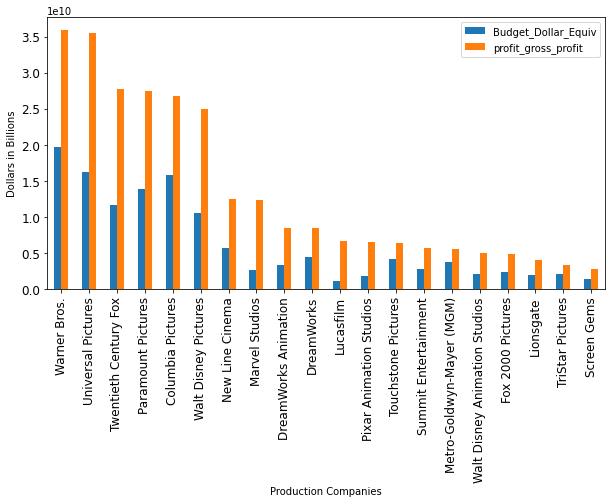

In [70]:
#plotting top studio profits
#top_20_studio.plot.bar(figsize=(10,6),)
fontsize=22
top_20_studio.plot.bar(
y=["Budget_Dollar_Equiv", "profit_gross_profit"],
ylabel = "Dollars in Billions",
xlabel= "Production Companies",
rot=90,
figsize=(10,5),
fontsize= 12)


legend= 22
plt.show()

In [67]:
# ploting the worst 20 performing studios
least_perf_20_studio = grouped_budget_df.nsmallest (20, ['profit_gross_profit', 'Budget_Dollar_Equiv'])
least_perf_20_studio.head()

,Budget_Dollar_Equiv,profit_gross_profit
production_company,,
Adela Pictures,854000000.0,-852102052.0
Radio Televisión Española (RTVE),488000000.0,-487945532.0
Canal+ España,489885000.0,-335252799.0
Franchise Pictures,512550000.0,-202736843.0
Maestranza Films,152500000.0,-152222404.0


<AxesSubplot:xlabel='Production Companies', ylabel='Dollars in Billions'>

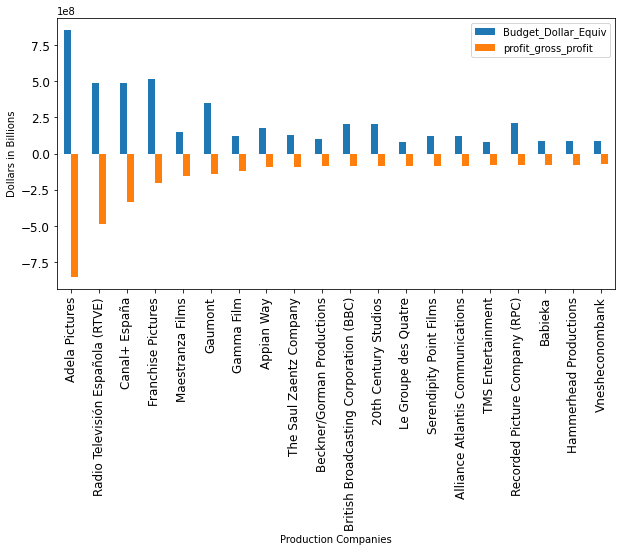

In [72]:
#studios with the least profit
least_perf_20_studio.plot.bar(y=["Budget_Dollar_Equiv", "profit_gross_profit"], rot=90, figsize=(10,5), fontsize = 12,
                             ylabel = "Dollars in Billions", xlabel= "Production Companies")

In [73]:
#adding percentage profits by company
grouped_percent=highest_grossing_co.groupby(['production_company'])['percent_profit_gross_budget'].sum()
grouped_percent.head()

production_company
"DIA" Productions GmbH & Co. KG          23.197017
"Weathering With You" Film Partners    1640.333144
.406 Production                         -95.768000
1 Bullet in the Gun Productions         -96.356000
100 Acres of Hell Productions           -92.073846
Name: percent_profit_gross_budget, dtype: float64

In [74]:
#prof_budget = merged_studio_dollar_df[["production_company", "year", "Budget_Dollar_Equiv", "profit_gross_budget"]].head(20)

#prof_budget.plot.bar(x="production_company", y=["year", "Budget_Dollar_Equiv", "profit_gross_budget"], rot=30, stacked=True, figsize=(20,12))


In [75]:
#making a copy of the merged data

movie_prefernce = merged_studio_dollar_df
movie_prefernce.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,$ 8811,$ 8811,NaN,237.0,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,$ 19181,$ 46008,99.0,295.0,122.0,1500000.0,19181.0,46008.0,-1453992.0,-96.932800
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,$ 163577,$ 457688,96.0,307.0,115.0,1500000.0,163577.0,457688.0,-1042312.0,-69.487467


In [76]:
#cleaning NA from movie_prefernce[avg_vote, review from critics and users]

movie_prefernce["reviews_from_critics"] = movie_prefernce["reviews_from_critics"].dropna()
movie_prefernce["avg_vote"] =  movie_prefernce["avg_vote"].dropna()
movie_prefernce["reviews_from_users"] = movie_prefernce["reviews_from_users"].dropna()
movie_prefernce.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Budget_Dollar_Equiv,new_usa_gross_income,new_worlwide_gross_income,profit_gross_budget,percent_profit_gross_budget
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,$ 8811,$ 8811,NaN,237.0,160.0,18000.0,8811.0,8811.0,-9189.0,-51.050000
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,$ 9183673,$ 9183673,NaN,45.0,16.0,800000.0,9183673.0,9183673.0,8383673.0,1047.959125
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,$ 1236166,$ 1349711,98.0,495.0,208.0,3726000.0,1236166.0,1349711.0,-2376289.0,-63.775872


In [77]:
from simple_colors import*


ModuleNotFoundError: No module named 'simple_colors'

In [ ]:
# randomly selecting a movie from a list  for a user to watch based on the user input of genre and year 


user_preference=True
while user_preference:
    g = input("YOUR PREFERED GENRE:  ") #input from user for prefered genre
    y = int(input("YOUR PREFERED YEAR:   "))# input year for movie
    print()
    if movie_prefernce[movie_prefernce['genre'].str.contains(g,case=False, regex=False)].size > 0: #input value must be within the genre column else it =0
        if movie_prefernce[movie_prefernce['year'].astype(int)==y].size > 0: # entered year must be withing the year column
            movie_year = movie_prefernce[movie_prefernce['year'].astype(int)==y]
            print(black("SUGGESTED MOVIE:",['bold', 'underlined']))
            print(red(movie_year[movie_year['genre'].str.contains(g,case=False, regex=False)].sample()['original_title'],'bold'))
        
 #Just in case the user changes his mind about the genre, he will have options 
            print()
            user_option = input('DO YOU LIKE THE SUGGESTED MOVIE? y/n:  ')
            if user_option == 'n':
                continue
            else:
                break
        else:
            print(blue('No Movie for that year, PLEASE MAKE NEW INPUT','bold'))
    else:
        print(blue('No Movie for that genre, PLEASE MAKE NEW INPUT','bold'))
       
    
print()
print("*******************")        
print(blue("Enjoy the Movie"))
print("*******************")
    